$$H = \sum_{i=1}^{N} \omega_q \, \sigma_{+}^{(i)} \sigma_{-}^{(i)} + \omega_f \, a^{\dagger} a + g \sum_{i=1}^{N} (\sigma_{+}^{(i)} a + \sigma_{-}^{(i)} a^{\dagger})$$

In [18]:
from qutip import basis, tensor
import matplotlib.pyplot as plt
from qutip import fock

In [19]:
# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |100000>, |010000>, and |001000>
state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_1000 + state_0100).unit()

#print(superposition_state)

In [20]:
# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# The combined state is already normalized if the individual states were normalized
#print(combined_state)

In [22]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options
import numpy as np

def setup_delocalized_system(num_qubits, omega_q, omega_f, g, num_superposition=2, num_excitations=1, boson_states=2):
    if num_excitations > num_qubits:
        raise ValueError("Number of excitations cannot exceed the number of qubits.")

    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian
    H = H_qubits + H_field + H_interaction

    return H, a, sm_list

# Example usage with 4 qubits, where two qubits are in superposition sharing one excitation
H, a, sm_list = setup_delocalized_system(num_qubits=4, num_superposition=3, omega_q=3.0, omega_f=1.0, g=0.05, num_excitations=1)

# Time evolution
times = np.linspace(0, 6000, 2000)  # Adjust time values as needed


result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list])

In [24]:
excitations

array([[5.00000000e-01, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [4.99931094e-01, 4.99931094e-01, 3.03585825e-05, 3.03585825e-05],
       [4.99727097e-01, 4.99727097e-01, 1.21113311e-04, 1.21113311e-04],
       ...,
       [2.61250417e-01, 2.61250417e-01, 2.36233199e-01, 2.36233199e-01],
       [2.64868021e-01, 2.64868021e-01, 2.32711458e-01, 2.32711458e-01],
       [2.68539077e-01, 2.68539077e-01, 2.29207995e-01, 2.29207995e-01]])

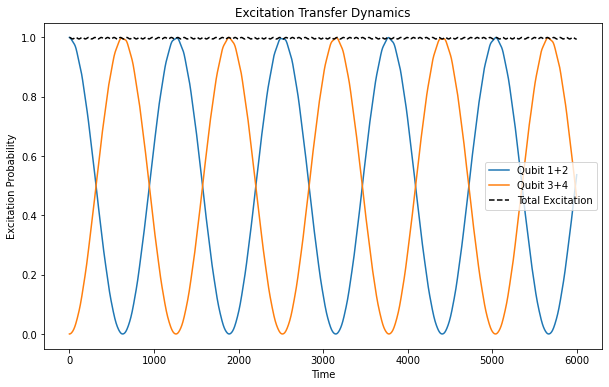

In [26]:
# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
#for i in range(len(sm_list)):
#    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")

plt.plot(times, excitations[:,0]+excitations[:,1], label=f"Qubit 1+2")
plt.plot(times, excitations[:,2]+excitations[:,3], label=f"Qubit 3+4")

plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

In [27]:
# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |100000>, |010000>, and |001000>
state_100000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0)
state_010000 = tensor(qubit_0, qubit_1, qubit_0, qubit_0, qubit_0, qubit_0)
state_001000 = tensor(qubit_0, qubit_0, qubit_1, qubit_0, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_100000 + state_010000 + state_001000).unit()

#print(superposition_state)

In [28]:
# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# The combined state is already normalized if the individual states were normalized
#print(combined_state)

In [29]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options
import numpy as np

def setup_delocalized_system(num_qubits, omega_q, omega_f, g, num_superposition=2, num_excitations=1, boson_states=2):
    if num_excitations > num_qubits:
        raise ValueError("Number of excitations cannot exceed the number of qubits.")

    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian
    H = H_qubits + H_field + H_interaction

    return H, a, sm_list

# Example usage with 4 qubits, where two qubits are in superposition sharing one excitation
H, a, sm_list = setup_delocalized_system(num_qubits=6, num_superposition=3, omega_q=3.0, omega_f=1.0, g=0.05, num_excitations=1)

# Time evolution
times = np.linspace(0, 6000, 2000)  # Adjust time values as needed


result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list])

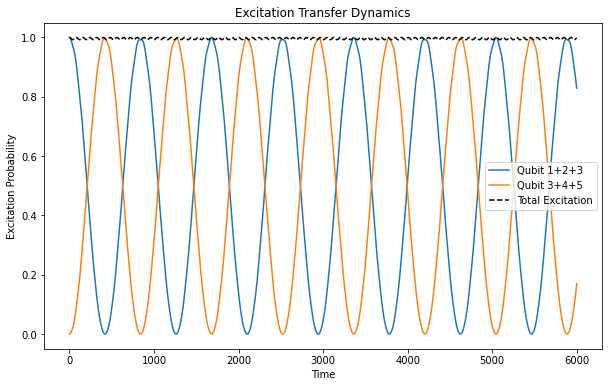

In [31]:

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
plt.plot(times, excitations[:,0]+excitations[:,1]+excitations[:,2], label=f"Qubit 1+2+3")
plt.plot(times, excitations[:,3]+excitations[:,4]+excitations[:,5], label=f"Qubit 3+4+5")

plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

In [42]:
from qutip import basis, tensor

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |100000>, |010000>, and |001000>
state_10000000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0)
state_01000000 = tensor(qubit_0, qubit_1, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0)
state_00100000 = tensor(qubit_0, qubit_0, qubit_1, qubit_0, qubit_0, qubit_0, qubit_0, qubit_0)
state_00010000 = tensor(qubit_0, qubit_0, qubit_0, qubit_1, qubit_0, qubit_0, qubit_0, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10000000 + state_01000000 + state_00100000 + state_00010000).unit()

#print(superposition_state2)

In [43]:
# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

# The combined state is already normalized if the individual states were normalized
#print(combined_state)

In [47]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options
import numpy as np

def setup_delocalized_system(num_qubits, omega_q, omega_f, g, num_superposition=2, num_excitations=1, boson_states=2):
    if num_excitations > num_qubits:
        raise ValueError("Number of excitations cannot exceed the number of qubits.")

    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian
    H = H_qubits + H_field + H_interaction

    return H, a, sm_list

# Example usage with 4 qubits, where two qubits are in superposition sharing one excitation
H, a, sm_list = setup_delocalized_system(num_qubits=8, num_superposition=3, omega_q=3.0, omega_f=1.0, g=0.05, num_excitations=1)

# Time evolution
times = np.linspace(0, 6000, 2000)  # Adjust time values as needed


result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list])

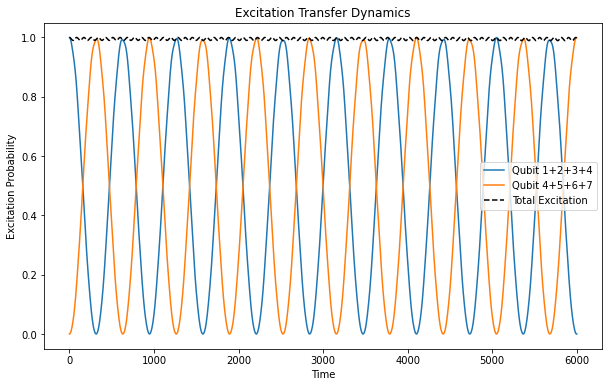

In [48]:

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
plt.plot(times, excitations[:,0]+excitations[:,1]+excitations[:,2]+excitations[:,3], label=f"Qubit 1+2+3+4")
plt.plot(times, excitations[:,4]+excitations[:,5]+excitations[:,6]+excitations[:,7], label=f"Qubit 4+5+6+7")

plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

In [60]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian

    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] *
                                         sm_list[i].dag() * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction + non_res_loss_term
    H = H_interaction

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=10.0, omega_f=0.1, g=0.01, gamma=0.0)

print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = fock(N_bosons, 0)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(superposition_state, boson_vacuum)

print(combined_state)

# Time evolution
times = np.linspace(0, 500000, 20000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


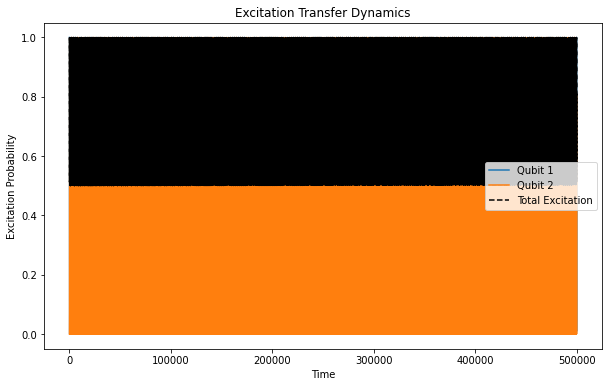

In [61]:

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

/Users/matt/anaconda3/envs/anaconda/lib/python3.11/site-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


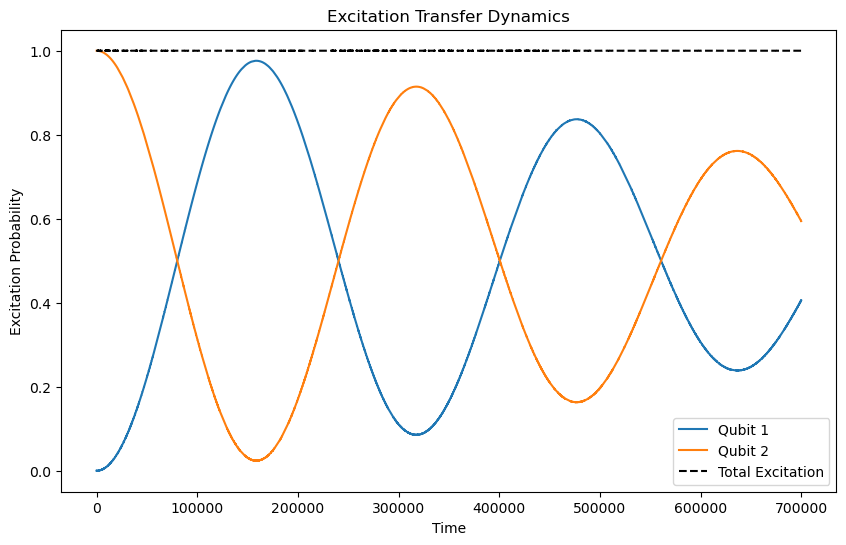

In [1]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian


    H_interaction_SB = sum([g * (sm_list[i].dag() + sm_list[i]) * (a + a.dag()) for i in range(num_qubits)])
    
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] *
                                         sm_list[i].dag() * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction_SB + non_res_loss_term
    #H = H_interaction_SB

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=10.0, omega_f=0.1, g=0.01, gamma=100.0)

#print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = basis(N_bosons, 0) # fock

print(boson_vacuum)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(boson_vacuum,superposition_state)

#print(combined_state)

# Time evolution
times = np.linspace(0, 700000, 2000000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


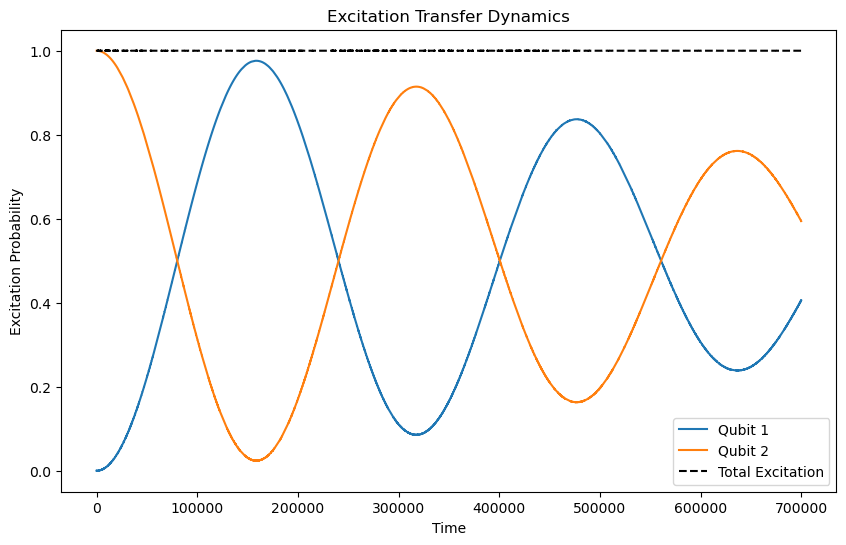

In [4]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian


    H_interaction_SB = sum([g * (sm_list[i].dag() + sm_list[i]) * (a + a.dag()) for i in range(num_qubits)])
    
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i]* sm_list[i].dag() * sm_list[j] 
                                          * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction_SB + non_res_loss_term
    #H = H_interaction_SB

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=10.0, omega_f=0.1, g=0.01, gamma=100.0)

#print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = basis(N_bosons, 0) # fock

print(boson_vacuum)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(boson_vacuum,superposition_state)

#print(combined_state)

# Time evolution
times = np.linspace(0, 700000, 2000000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()

In [16]:
H

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.00e+00-100.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j
  0.00e+00  +0.j 1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 1.00e-01-100.j 1.00e-02  +0.j 0.00e+00  +0.j
  1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 1.00e-02  +0.j 1.00e+01  +0.j 0.00e+00  +0.j
  0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j]
 [1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.01e+01  +0.j
  0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j
  1.00e+01  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j]
 [1.00e-02  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j
  0.00e+00  +0.j 1.01e+01  +0.j 1.00e-02  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 0.00e+00  +0.j 0.00e+00  +0.j 1.00e-02  +0.j
  0.00e+00  +0.j 1.00e-02  +0.j 2.00e+01  +0.j 0.00e+00  +0.j]
 [0.00e+00  +0.j 0.00e

In [12]:
sm_list[1]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [13]:
sm_list[0]

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [ ]:
from qutip import tensor, destroy, qeye, basis, mesolve, Options, fock
import numpy as np
import matplotlib.pyplot as plt

def setup_system(omega_q, omega_f, g, gamma, boson_states=2):
    
    num_qubits = 2 
    
    # Operators for the qubits
    sm_list = [tensor([destroy(2) if i == j else qeye(2) for j in range(num_qubits)] + [qeye(boson_states)])
               for i in range(num_qubits)]

    #print(sm_list)
    
    # Operator for the bosonic field
    a = tensor([qeye(2) for _ in range(num_qubits)] + [destroy(boson_states)])

    # Hamiltonian
    H_qubits = sum([omega_q * sm_list[i].dag() * sm_list[i] for i in range(num_qubits)])  # Free Hamiltonian of the qubits
    H_field = omega_f * a.dag() * a  # Free Hamiltonian of the field
    H_interaction = sum([g * (sm_list[i].dag() * a + sm_list[i] * a.dag()) for i in range(num_qubits)])  # Interaction Hamiltonian


    H_interaction_SB = sum([g * (sm_list[i].dag() + sm_list[i]) * (a + a.dag()) for i in range(num_qubits)])
    
    non_res_loss_term = -0.5j * gamma * sum([sm_list[i] * sm_list[j] *
                                         sm_list[i].dag() * sm_list[j].dag() 
                                         for i in range(num_qubits) for j in range(num_qubits) 
                                         if i != j])


    H = H_qubits + H_field + H_interaction + non_res_loss_term
    #H = H_interaction_SB

    return H, a, sm_list


H, a, sm_list = setup_system(omega_q=10.0, omega_f=0.1, g=0.01, gamma=0.0)

#print(H)

# Bosonic field in vacuum state with a maximum of 2 bosons
N_bosons = 2  # Including states with 0, 1, and 2 bosons
boson_vacuum = basis(N_bosons, 0) # fock

print(boson_vacuum)

# Basis states for a single qubit
qubit_0 = basis(2, 0)
qubit_1 = basis(2, 1)

# Creating the basis states |1000> and |0100>
#state_1000 = tensor(qubit_1, qubit_0, qubit_0, qubit_0)
#state_0100 = tensor(qubit_0, qubit_1, qubit_0, qubit_0)
state_10 = tensor(qubit_1, qubit_0)

# Forming the superposition state and normalizing it
superposition_state = (state_10).unit()

# Tensor the superposition state with the bosonic field
combined_state = tensor(boson_vacuum,superposition_state)

#print(combined_state)

# Time evolution
times = np.linspace(0, 700000, 2000000)  # Adjust time values as needed

#opts = Options(normalize_output=False)
opts = Options(normalize_output=True)
result = mesolve(H, combined_state, times, [], [sm.dag() * sm for sm in sm_list], options=opts)

# Analyzing results
excitations = np.array(result.expect).T  # Transpose for easier plotting

# Calculating the total excitation probability
total_excitation = np.sum(excitations, axis=1)

# Plotting the excitation probabilities for each qubit over time
plt.figure(figsize=(10, 6))
for i in range(len(sm_list)):
    plt.plot(times, excitations[:, i], label=f"Qubit {i+1}")
plt.plot(times, total_excitation, label='Total Excitation', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('Excitation Probability')
plt.title('Excitation Transfer Dynamics')
plt.legend()
plt.show()